In [1]:
import os
import pandas as pd
import geopandas as gpd
import pdb
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point
from shapely.ops import cascaded_union
import shapely.wkt
from fiona.crs import from_epsg
import fiona
from geopandas.tools import sjoin

plt.rcParams["figure.figsize"] = [16, 9] #optional

# Neighborhoods

In [29]:
king_county = os.path.join(os.getcwd(), 'datafiles/neighborhood_SHP/neighborhood/neighborhood.shp')
king_county_data = gpd.read_file(king_county)
king_county_data = king_county_data.to_crs({'init': 'epsg:4326'})
# king_county_data = king_county_data.to_crs({'init': 'epsg:4326'})
# print(king_county)

# kc_data = king_county_data.loc[:, ('GEO_ID_GRP','geometry')]
# len(king_county_data.loc[:, 'NEIGHBORHO'].unique())
# king_county_data

OSError: no such file or directory: 'C:\\Users\\dariu\\DSSG\\SEAMO\\Seattle-Mobility-Index\\scripts\\preproc\\datafiles/neighborhood_SHP/neighborhood/neighborhood.shp'

In [ ]:
blockgroup_fp = os.path.join(os.getcwd(), 'Seattle-Mobility-Index\\seamo\\data\\processed\\SeattleCensusBlockGroups.csv')
blkgrp = gpd.pd.read_csv(blockgroup_fp)
# blkgrps = blkgrp.loc[:, 'coordinates']
# blkgrp
# print(type(blkgrp))
blkgrps = blkgrp['coordinates'].apply(shapely.wkt.loads)
print(blkgrps)


polygons = blkgrps
boundary = gpd.GeoSeries(cascaded_union(polygons))
# boundary.plot(color = 'red')
# plt.show()
# polygons[0]
boundary.crs = from_epsg(4326)

In [ ]:
crs = {'init': 'epsg:4326'}
county = gpd.GeoDataFrame(king_county_data.loc[:, ('NEIGHBORHO','geometry')], crs=crs, geometry='geometry')
# multi = boundary[0]
outline = gpd.GeoDataFrame(boundary, crs=crs)
county
outline.columns=['geometry']
# type(county)

In [ ]:
rectangle = gpd.GeoDataFrame([Polygon([(-122.435896, 47.734000),
                                             (-122.285766, 47.734000),
                                             (-122.285766, 47.735004),
                                             (-122.246627, 47.683255),
                                             (-122.245314, 47.495860),
                                             (-122.435896, 47.495860)])],
                            columns=['geometry'],
                         geometry='geometry')
rectangle.crs = from_epsg(4326)
rectangle.crs = gdf.crs

In [ ]:
seattle = gpd.overlay(outline, rectangle, how='intersection')
seattle.crs = from_epsg(4326)
seattle.crs = county.crs
print(seattle)
seattle.plot()

In [ ]:
data = sjoin(county, seattle, op='intersects')
# op='intersects'
data.plot(cmap="tab20b")
len(data['NEIGHBORHO'].unique())
data

# Council Districts

In [ ]:
king_county = os.path.join(os.getcwd(), 'Seattle-Mobility-Index/seamo/data/raw/shapefiles/sccdst.shp')
king_county_data = gpd.read_file(king_county)
king_county_data = king_county_data.to_crs({'init': 'epsg:4326'})

In [ ]:
crs = {'init': 'epsg:4326'}
county = gpd.GeoDataFrame(king_county_data.loc[:, ('NAME','geometry')], crs=crs, geometry='geometry')

data = sjoin(county, seattle, op='intersects')
# op='intersects'
data.plot(cmap="tab20b")
data

# Zipcode

In [ ]:
king_county = os.path.join(os.getcwd(), 'Seattle-Mobility-Index/seamo/data/raw/shapefiles/zipcode.shp')
king_county_data = gpd.read_file(king_county)
king_county_data = king_county_data.to_crs({'init': 'epsg:4326'})
# king_county_data

In [ ]:
crs = {'init': 'epsg:4326'}
county = gpd.GeoDataFrame(king_county_data.loc[:, ('ZIPCODE','geometry')], crs=crs, geometry='geometry')

data = sjoin(county, seattle, op='intersects')
# op='intersects'
data.plot(cmap="tab20b")
data

# Urban Village

In [ ]:
king_county = os.path.join(os.getcwd(), 'Seattle-Mobility-Index/seamo/data/raw/shapefiles/DPD_uvmfg_polygon.shp')
king_county_data = gpd.read_file(king_county)
king_county_data = king_county_data.to_crs({'init': 'epsg:4326'})
# king_county_data

In [ ]:
crs = {'init': 'epsg:4326'}
county = gpd.GeoDataFrame(king_county_data.loc[:, ('UV_NAME','geometry')], crs=crs, geometry='geometry')

data = sjoin(county, seattle, op='intersects')
# op='intersects'
data.plot(cmap="tab20b")
data

# Block Groups

In [4]:
king_county = os.path.join(os.getcwd(), 'Seattle-Mobility-Index/seamo/data/raw/shapefiles/blkgrp10_shore.shp')
seattle = os.path.join(os.getcwd(), 
                       'Seattle-Mobility-Index/seamo/data/raw/SeattleCensusBlocksandNeighborhoodCorrelationFile.xlsx')
king_county_data = gpd.read_file(king_county)
king_county_data = king_county_data.to_crs({'init': 'epsg:4326'})
seattle_data = pd.read_excel(seattle)

kc_data = king_county_data.loc[:, ('GEO_ID_GRP','geometry')]
s_data = seattle_data.loc[:, 'GEOID10'].astype(str).str[6:12].unique()

OSError: no such file or directory: 'C:\\Users\\dariu\\DSSG\\SEAMO\\Seattle-Mobility-Index\\scripts\\preproc\\Seattle-Mobility-Index/seamo/data/raw/shapefiles/blkgrp10_shore.shp'

In [ ]:
s = pd.DataFrame(s_data.astype(str))
s.columns = ['tract_blkgrp']
# (name='tract_blkgrp').astype(np.int64)
# print(type(s_data))
tract_blkgrp = kc_data.loc[:, 'GEO_ID_GRP'].str[6:].astype(str)
geometry = kc_data.loc[:, 'geometry']

In [ ]:
tract_blkgrp.to_frame(name='tract_blkgrp')
geometry.to_frame(name='geometry')
kc = pd.concat([tract_blkgrp, geometry],axis=1)
kc.columns=['tract_blkgrp', 'geometry']

In [ ]:
kc_s_join = pd.merge(s, kc, left_on='tract_blkgrp', right_on='tract_blkgrp', how='inner')
# len(kc_s_join)

In [ ]:
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(kc_s_join, crs=crs, geometry='geometry')
gdf = gpd.overlay(gdf, rectangle, how='intersection')
# gdf = gdf.to_crs({'init': 'epsg:4326'})
gdf.plot(cmap="tab20b")
# data.loc[:, 'tract_blkgrp']
data = pd.concat([gdf, gdf.geometry.centroid], axis=1)
data.columns=['tract_blkgrp', 'geometry', 'centroid']

In [ ]:
fp = king_county = os.path.join(os.getcwd(), '../seamo/data/processed/SeattleCensusBlockGroups.csv')
# data.to_csv(fp)

In [ ]:
# desired_geometry = "aaa"
desired_geometry = str(bbb) + '.shp'
print(os.path.join('seamo/data/raw/shapefiles/', str(desired_geometry)))

                    NAME                                           geometry
0  Seattle Council Dst 1  POLYGON ((-122.3730782611067 47.58667737505255...
1  Seattle Council Dst 2  POLYGON ((-122.3171912399914 47.60001656429883...
2  Seattle Council Dst 3  POLYGON ((-122.3202590706666 47.65232919034227...
3  Seattle Council Dst 4  (POLYGON ((-122.2720770238617 47.6926713879534...
4  Seattle Council Dst 5  POLYGON ((-122.3611620284063 47.73414102573201...
5  Seattle Council Dst 6  POLYGON ((-122.3811280270266 47.70894954859607...
6  Seattle Council Dst 7  POLYGON ((-122.4032385959662 47.66637345478555...
                                             geometry
0   POLYGON ((-122.2595276793426 47.50130794632367...
1   POLYGON ((-122.3708748142306 47.50820080555692...
2   POLYGON ((-122.3460101178819 47.59050257140254...
3   POLYGON ((-122.3295481559281 47.64170985627933...
4   POLYGON ((-122.2871819852291 47.64576136038115...
5   POLYGON ((-122.2944766243575 47.64610507045116...
6   POLYGON ((

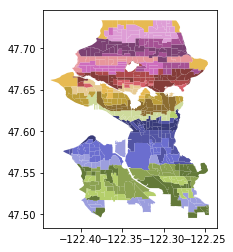

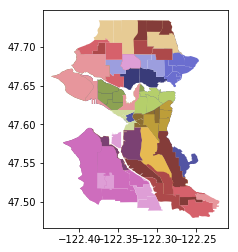

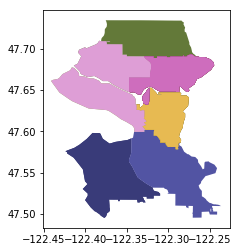

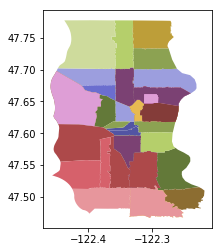

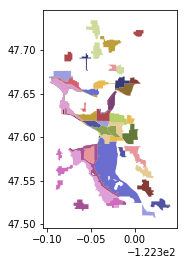

In [39]:
def read_file_into_dataframe(desired_geometry, name, crs):
    # shapefile filepath
    desired_geometry = str(desired_geometry) + '.shp'
    FP = os.path.join(os.pardir, os.pardir,
        'seamo/data/raw/shapefiles/', desired_geometry)

    # read filepath into dataframe
    df = gpd.read_file(FP)

    # convert stateplane to lat/long
    df = df.to_crs({'init': 'epsg:4326'})

    # select desired columns and convert into geodataframe
    if desired_geometry == 'blkgrp10_shore' + '.shp':
        gdf = gpd.GeoDataFrame(df.loc[:, (name, 'Shape_area', 'geometry')],
            crs=crs, geometry='geometry')

        # process columns from geodataframe
        tract_blkgrp = gdf.loc[:, 'GEO_ID_GRP'].str[6:].astype(str)
        geometry = gdf.loc[:, 'geometry']
        area = gdf.loc[:, 'Shape_area']
        
        # convert series back to dataframe
        tract_blkgrp.to_frame(name='tract_blkgrp')
        geometry.to_frame(name='geometry')
        area.to_frame(name='area')
        gdf = pd.concat([tract_blkgrp, geometry, area],axis=1)
        gdf.columns=['tract_blkgrp', 'geometry', 'area']

    else:
        gdf = gpd.GeoDataFrame(df.loc[:, (name, 'geometry')],
            crs=crs, geometry='geometry')
    return gdf


def process_data(desired_geometry, name, crs, outline, rectangle):
    gdf = read_file_into_dataframe(desired_geometry, name, crs)
    seattle = gpd.overlay(outline, rectangle, how='intersection')
    seattle.crs = from_epsg(4326)
    seattle.crs = gdf.crs
    
    if desired_geometry == 'sccdst':
        print(gdf)
        print(seattle)

    # spatial join between king county and seattle
    data = sjoin(gdf, seattle, op='intersects')
    data = data.drop(['index_right'], axis=1)
    if desired_geometry == 'sccdst':
        mask = data.NAME.duplicated(keep=False)
#         data = data[~mask]
        print(mask)

    # plot map
    data.plot(cmap="tab20b")
    if desired_geometry == 'sccdst':
        print(data)
    return data


def seattle_outline(df, crs):
    blkgrps = df.geometry
    polygons = blkgrps
    boundary = gpd.GeoSeries(cascaded_union(polygons))
    # boundary.plot(color = 'red')
    # plt.show()
    boundary.crs = from_epsg(4326)
    outline = gpd.GeoDataFrame(boundary, crs=crs)
    outline.columns = ['geometry']
    return outline


def write_to_csv(desired_output, data):
    desired_output = str(desired_output) + '.csv'
    PRCOESSED_FP = os.path.join(os.pardir, os.pardir,
        'seamo/data/processed/csv_files/', desired_output)
    data.to_csv(PRCOESSED_FP)


def main():
    # create boundary for seattle
    crs = {'init': 'epsg:4326'}
    rectangle = gpd.GeoDataFrame([Polygon([(-122.435896, 47.734000),
        (-122.285766, 47.734000),
        (-122.285766, 47.735004),
        (-122.246627, 47.683255),
        (-122.245314, 47.495860),
        (-122.435896, 47.495860)])],
        columns=['geometry'], geometry='geometry')
    rectangle.crs = from_epsg(4326)

    # Block Group
    # shape file and correlation csv filepaths
    SEATTLE_FP = 'seamo/data/raw/SeattleCensusBlocksandNeighborhoodCorrelationFile.xlsx'
    SEATTLE_FP = os.path.join(os.pardir, os.pardir, SEATTLE_FP)

    # read filepath into dataframe
    seattle_data = pd.read_excel(SEATTLE_FP)

    # select desired columns
    s_data = seattle_data.loc[:, 'GEOID10'].astype(str).str[6:12].unique()

    # process Seattle correlation dataframe
    s = pd.DataFrame(s_data.astype(str))
    s.columns = ['tract_blkgrp']

    # process King County correlation dataframe
    gdf = read_file_into_dataframe('blkgrp10_shore', 'GEO_ID_GRP', crs)

    # inner join on Seattle census tract/block groups
    gdf = pd.merge(s, gdf, left_on='tract_blkgrp',
        right_on='tract_blkgrp', how='inner')

    # convert pandas dataframe to geopandas dataframe
    gdf = gpd.GeoDataFrame(gdf, crs=crs, geometry='geometry')
    gdf.crs = from_epsg(4326)

    # overlay boundary of seattle with current outline to remove noise
    data = gpd.overlay(gdf, rectangle, how='intersection')

    # plot map
    data.plot(cmap="tab20b")

    # calculate centroids
    blkgrps = pd.concat([data, data.geometry.centroid], axis=1)
    blkgrps.columns = ['tract_blkgrp', 'area', 'geometry', 'centroid']

    # outline of seattle used for overlay intersection
    outline = seattle_outline(blkgrps, crs)

    # Neighborhood
    neighborhoods = process_data('neighborhood', 'NEIGHBORHO',
        crs, outline, rectangle)

    # Council District
    coucil_districts = process_data('sccdst', 'NAME',
        crs, outline, rectangle)

    # Zipcode
    zipcodes = process_data('zipcode', 'ZIPCODE',
        crs, outline, rectangle)

    # Urban Village
    urban_villages = process_data('DPD_uvmfg_polygon', 'UV_NAME',
        crs, outline, rectangle)
    #write to csv file
#     write_to_csv('SeattleNeighborhoods', neighborhoods)
#     write_to_csv('SeattleCouncilDistricts', coucil_districts)
#     write_to_csv('SeattleZipcodes', zipcodes)
#     write_to_csv('SeattleUrbanVillages', urban_villages)
#     write_to_csv('SeattleCensusBlockGroups', blkgrps)
main()